In [4]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [5]:
#Load Data
moviedata=pd.read_csv('MovieTop250.csv')
moviedata.head()

,Name,Gender,Star,Summary,Director,Realase Date,Reward
0,The Shawshank Redemption,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,1994,21 wins & 43 nominations total
1,The Godfather,Crime,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,1972,31 wins & 30 nominations total
2,The Godfather: Part II,Crime,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,1974,17 wins & 20 nominations total
3,The Dark Knight,Action,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,2008,159 wins & 163 nominations total
4,12 Angry Men,Crime,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,1957,17 wins & 13 nominations total


In [6]:
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          250 non-null    object 
 1   Gender        250 non-null    object 
 2   Star          250 non-null    float64
 3   Summary       250 non-null    object 
 4   Director      250 non-null    object 
 5   Realase Date  250 non-null    int64  
 6   Reward        250 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 13.8+ KB


In [7]:
#Convert object to numeric
from nltk.tokenize import word_tokenize

In [8]:
def make_tokenize(string):
    result = 0
    if string:
        result=word_tokenize(string)
        result=result[0]
    return result

In [9]:
moviedata['Reward']=moviedata['Reward'].apply(make_tokenize)
moviedata['Reward']=pd.to_numeric(moviedata['Reward'], errors='coerce')

In [10]:
moviedata.describe()

,Star,Realase Date,Reward
count,250.000000,250.000000,249.000000
mean,8.304400,1986.556000,35.152610
std,0.223563,25.106977,44.231712
min,8.100000,1921.000000,1.000000
25%,8.100000,1966.250000,7.000000
50%,8.200000,1994.000000,20.000000
75%,8.400000,2006.750000,44.000000
max,9.300000,2021.000000,305.000000


In [11]:
#Calculating the average rating of the films made by the directors
director_data = pd.DataFrame({
    'director' : moviedata['Director'].value_counts().index,
    'count' : moviedata['Director'].value_counts(),
    'mean_imdb_rating' : None
}).sort_values('director').reset_index(drop = True)

for i in range(len(director_data)):
    director_filter = moviedata['Director'] == director_data.iloc[i,0]
    filtered_movies = moviedata[director_filter]
    director_data.iloc[i,2] = round(filtered_movies['Star'].mean(), 3)

In [12]:
director_data.drop(director_data[director_data["count"] <= 2].index, inplace = True)
director_data

,director,count,mean_imdb_rating
2,Akira Kurosawa,6,8.317
4,Alfred Hitchcock,6,8.317
10,Billy Wilder,5,8.32
19,Charles Chaplin,5,8.38
20,Christopher Nolan,7,8.557
21,Clint Eastwood,3,8.133
28,David Fincher,3,8.5
33,Denis Villeneuve,3,8.3
43,Francis Ford Coppola,3,8.867
44,Frank Capra,3,8.267


In [13]:
#Number of rewards received from movies
moviename_data = pd.DataFrame({
    'name' : moviedata['Name'],
    'reward' : moviedata['Reward']
    
}).sort_values('reward').reset_index(drop = True)

In [14]:
moviename_data.drop(moviename_data[moviename_data["reward"] <= 150].index, inplace = True)
moviename_data

,name,reward
242,Inception,157.0
243,The Dark Knight,159.0
244,No Country for Old Men,163.0
245,The Lord of the Rings: The Return of the King,209.0
246,12 Years a Slave,243.0
247,Mad Max: Fury Road,245.0
248,Gisaengchung,305.0
249,Life of Brian,NaN


In [15]:
#Some graphics

import plotly.express as px

fig = px.pie(moviedata, values=('Star'), names=('Gender'))

fig2 = px.pie(moviedata, values=('Reward'), names=('Gender'))

fig3 = px.pie(director_data, values=('mean_imdb_rating'), names=('director'))

fig4 = px.pie(moviename_data, values=('reward'), names=('name'))


In [ ]:
import dash
from dash import html
from dash import dcc


app = dash.Dash(__name__)

app.layout = html.Div(children=[html.H1('IMDb Top 250 Movies',style={'textAlign': 'center', 'color': '#503D36', 'font-size': 40}),
                                html.H4('Top 250 as rated by IMDb Users',style={'textAlign': 'center', 'color': '#503D36', 'font-size': 20}),
                                html.P(html.P('Distribution of points given according to movie genres', style={'textAlign':'center', 'color': '#F57241'}),),
                                dcc.Graph(figure=fig),
                                html.P(html.P('Distribution of reward given according to movie genres', style={'textAlign':'center', 'color': '#F57241'}),),
                                dcc.Graph(figure=fig2),
                                html.P(html.P('Mean IMDb Ratings', style={'textAlign':'center', 'color': '#F57241'}),),
                                dcc.Graph(figure=fig3),
                                html.P(html.P('Reward-winning films', style={'textAlign':'center', 'color': '#F57241'}),),
                                dcc.Graph(figure=fig4)

                    ])

                   
if __name__ == '__main__':
    app.run_server()

In [16]:
#How many films have been placed on the top 250 list in 10 years?
moviedata['decade'] = ((moviedata['Realase Date'] // 10).astype(int) * 10)
moviedata.head(5)

,Name,Gender,Star,Summary,Director,Realase Date,Reward,decade
0,The Shawshank Redemption,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,1994,21.0,1990
1,The Godfather,Crime,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,1972,31.0,1970
2,The Godfather: Part II,Crime,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,1974,17.0,1970
3,The Dark Knight,Action,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,2008,159.0,2000
4,12 Angry Men,Crime,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,1957,17.0,1950


In [17]:
movies_per_decade = pd.DataFrame({
    "decade" : moviedata['decade'].value_counts().index,
    "movies" : moviedata['decade'].value_counts()
}).sort_values('decade').reset_index(drop = True)

In [18]:
movies_per_decade

,decade,movies
0,1920,7
1,1930,6
2,1940,10
3,1950,25
4,1960,18
5,1970,18
6,1980,29
7,1990,41
8,2000,46
9,2010,46


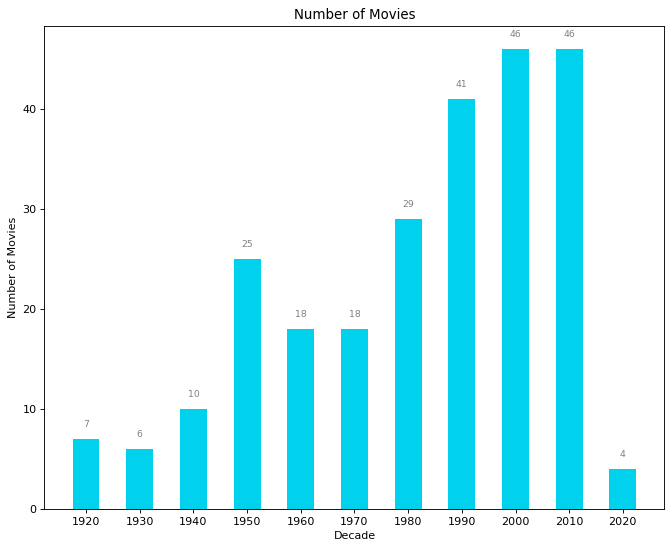

In [22]:
import plotly.express as px
fig7, ax = plt.subplots(figsize=(10,8), dpi=80)
#plot the graphs
plot_1 = ax.bar(
    movies_per_decade["decade"], 
    movies_per_decade["movies"], 
    label="Number of movies",
    color="#00d1ed", 
    width=5
)
ax.title.set_text("Number of Movies")
ax.set_xlabel("Decade")
ax.set_ylabel("Number of Movies")

# Add data labels to bar plot
for rect in plot_1:
    x = rect.get_x() + (rect.get_width() / 2)
    y = rect.get_height()
    ax.text(x, y + 1, f'{y:.0f}', ha='center', va='bottom', fontsize="small", color="grey")
    
rows = movies_per_decade.decade.tolist()
ax.set_xticks(np.arange(min(rows), max(rows) + 1, 10))

In [23]:
#Most frequently used words in movie descriptions
sum_data = pd.DataFrame({
    'sum' : moviedata['Summary'],
})

In [24]:
#import some libraries for text analysis
import nltk
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [25]:
sum_data['tokenized'] = sum_data.apply(lambda row: nltk.word_tokenize(row['sum']), axis=1)

In [26]:
def clean_text(text):
    # remove everything except alphabets
    text = re.sub("[^a-zA-Z]", " ", text)
    # remove whitespaces
    text = ' '.join(text.split(','))
    text = text.lower()
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)
    

sum_data['clean_text'] = sum_data['sum'].apply(clean_text)
sum_data['clean_text']


0      two imprisoned men bond number years finding s...
1      organized crime dynasty aging patriarch transf...
2      early life career vito corleone new york city ...
3      menace known joker wreaks havoc chaos people g...
4      jury holdout attempts prevent miscarriage just...
                             ...                        
245    home sick bed young boy grandfather reads stor...
246    sub inspector sets pursuit mysterious serial k...
247    four men plan technically perfect crime human ...
248    waifish prostitute wanders streets rome lookin...
249    sophisticated urban woman seduces farmer hopes...
Name: clean_text, Length: 250, dtype: object

In [27]:
from collections import Counter
from wordcloud import WordCloud,STOPWORDS

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("first_review.png")